# HW07: Кластеризация, внутренние метрики качества, PCA/t-SNE и "честный" unsupervised-эксперимент на синтетических данных.
**Студент:** Чайка Никита Валентинович  
**Группа:** ИНБО-10-22

### **1. Загрузка данных и первичный анализ**

In [1]:
# Импортировать необходимые библиотеки
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, DBSCAN

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import json

In [2]:
#Загрузить выбранный датасет
url1 = "data\S07-hw-dataset-01.csv"
url2 = "data\S07-hw-dataset-02.csv"
url3 = "data\S07-hw-dataset-03.csv"
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
print('Датасет 01 успешно импортирован' if not df1.empty else 'Датасет 01 не импортирован')
print('Датасет 02 успешно импортирован' if not df2.empty else 'Датасет 02 не импортирован')
print('Датасет 03 успешно импортирован' if not df3.empty else 'Датасет 03 не импортирован')

Датасет 01 успешно импортирован
Датасет 02 успешно импортирован
Датасет 03 успешно импортирован


<>:2: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:3: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:4: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:2: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:3: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:4: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
C:\Temp\ipykernel_3528\3617469391.py:2: SyntaxWarning: "\S" is an invalid escape s

In [3]:
# Выполнить первичный осмотр данных**
display(df1.head())       
df1.info()                
display(df1.describe())   

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745


In [4]:
display(df2.head())       
df2.info()                
display(df2.describe())  

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076


In [5]:
display(df3.head())       
df3.info()              
display(df3.describe())  

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865


In [6]:
print(df1.isna().sum()) 
print(df2.isna().sum()) 
print(df3.isna().sum())

sample_id    0
f01          0
f02          0
f03          0
f04          0
f05          0
f06          0
f07          0
f08          0
dtype: int64
sample_id    0
x1           0
x2           0
z_noise      0
dtype: int64
sample_id    0
x1           0
x2           0
f_corr       0
f_noise      0
dtype: int64


In [7]:
sample_id_1 = df1["sample_id"]
X1 = df1.drop(columns=["sample_id"])

sample_id_2 = df2["sample_id"]
X2 = df2.drop(columns=["sample_id"])

sample_id_3 = df3["sample_id"]
X3 = df3.drop(columns=["sample_id"])

***Первичный просмотр данных показал:***
- *Датасет 01: числовые признаки, пропусков нет, разница в масштабах.* 
- *Датасет 02: числовые признаки, пропусков нет, шумовой признак `z_noise`, нелинейная структура.*
- *Датасет 03: числовые признаки, пропусков нет, шумовой признак `f_noise`, разная плотность.*

### **2. Препроцессинг (обязательно)**

In [8]:
# Универсальный препроцессинг для всех числовых признаков
numeric_preprocessor = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X1_prepared = numeric_preprocessor.fit_transform(X1)

X2_prepared = numeric_preprocessor.fit_transform(X2)

X3_prepared = numeric_preprocessor.fit_transform(X3)

print("dfs01 shape:", X1_prepared.shape)
print("dfs02 shape:", X2_prepared.shape)
print("dfs03 shape:", X3_prepared.shape)

dfs01 shape: (12000, 8)
dfs02 shape: (8000, 3)
dfs03 shape: (15000, 4)


### **3. Модели недели 7 (для каждого датасета – минимум 2 алгоритма)**

#### **3.1. Датасет 01 — KMeans**

In [10]:
best_configs = {}
# Датасет 01 — KMeans
best_configs["dataset_01"] = {}

**Подбор числа кластеров k**

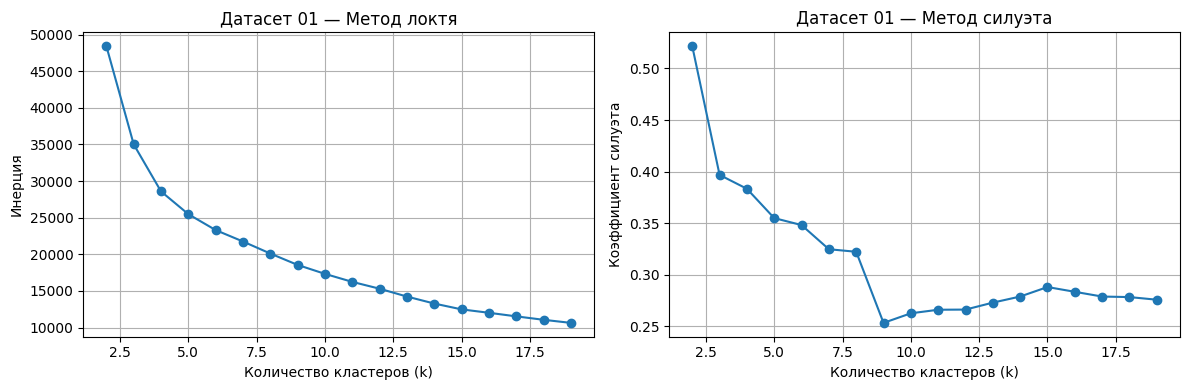

In [ ]:
# Подбор числа кластеров k
k_range = range(2, 20)

inertias_ds1 = []
silhouette_ds1 = []

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=666,
        n_init=10
    )
    labels = kmeans.fit_predict(X1_prepared)
    inertias_ds1.append(kmeans.inertia_)
    silhouette_ds1.append(silhouette_score(X1_prepared, labels))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# График локтя
axes[0].plot(list(k_range), inertias_ds1, marker='o')
axes[0].set_xlabel("Количество кластеров (k)")
axes[0].set_ylabel("Инерция")
axes[0].set_title("Датасет 01 — Метод локтя")
axes[0].grid(True)

# График силуэта
axes[1].plot(list(k_range), silhouette_ds1, marker='o')
axes[1].set_xlabel("Количество кластеров (k)")
axes[1].set_ylabel("Коэффициент силуэта")
axes[1].set_title("Датасет 01 — Метод силуэта")
axes[1].grid(True)

plt.tight_layout()
plt.savefig(
    "artifacts/figures/ds01_kmeans_elbow_silhouette.png",
    dpi=150
)
plt.show()

In [13]:
best_k_ds1 = 4
print(f"Лучший k (Датасет 01): {best_k_ds1}")

best_configs["dataset_01"]["KMeans"] = {
    "лучший k": int(best_k_ds1),
    "критерий выбора": "локоть + высокий силуэт",
}

Лучший k (Датасет 01): 4


In [ ]:
# Выполнение алгоритма с лучшим k
kmeans_ds1 = KMeans(
    n_clusters=best_k_ds1,
    random_state=666,
    n_init=10
)

labels_kmeans_ds1 = kmeans_ds1.fit_predict(X1_prepared)

#### **3.2. Датасет 01 — DBSCAN**

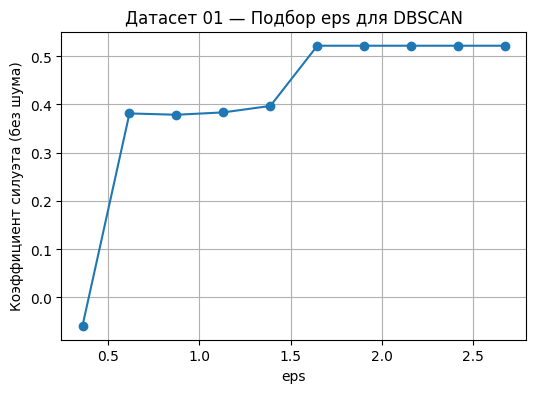

In [ ]:
# Подбор числа eps
eps_range = np.linspace(0.1, 5.0, 20)
silhouette_dbscan = []

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X1_prepared)

    mask = labels != -1
    unique_clusters = np.unique(labels[mask])
    
    if len(unique_clusters) > 1:
        score = silhouette_score(X1_prepared[mask], labels[mask])
    else:
        score = np.nan
    silhouette_dbscan.append(score)

plt.figure(figsize=(6,4))
plt.plot(eps_range, silhouette_dbscan, marker='o')
plt.xlabel("eps")
plt.ylabel("Коэффициент силуэта (без шума)")
plt.title("Датасет 01 — Подбор eps для DBSCAN")
plt.grid(True)
plt.savefig(
    "artifacts/figures/ds01_dbscan_eps.png",
    dpi=150
)
plt.show()

In [16]:
best_eps_ds1 = eps_range[np.nanargmax(silhouette_dbscan)]
print(f"Лучший eps (Датасет 01): {best_eps_ds1}")

best_configs["dataset_01"]["DBSCAN"] = {
    "лучший eps": float(best_eps_ds1),
    "min_samples": 5,
}

Лучший eps (Датасет 01): 1.6473684210526318


In [17]:
# Выполнение алгоритма с лучшим eps
dbscan_ds1 = DBSCAN(eps=best_eps_ds1, min_samples=5)
labels_dbscan_ds1 = dbscan_ds1.fit_predict(X1_prepared)

noise_ratio_ds1 = np.mean(labels_dbscan_ds1 == -1)
print(f"Доля шума: {noise_ratio_ds1:.2%}")

Доля шума: 0.00%


#### **3.3. Датасет 02 — KMeans**

In [18]:
best_configs["dataset_02"] = {}

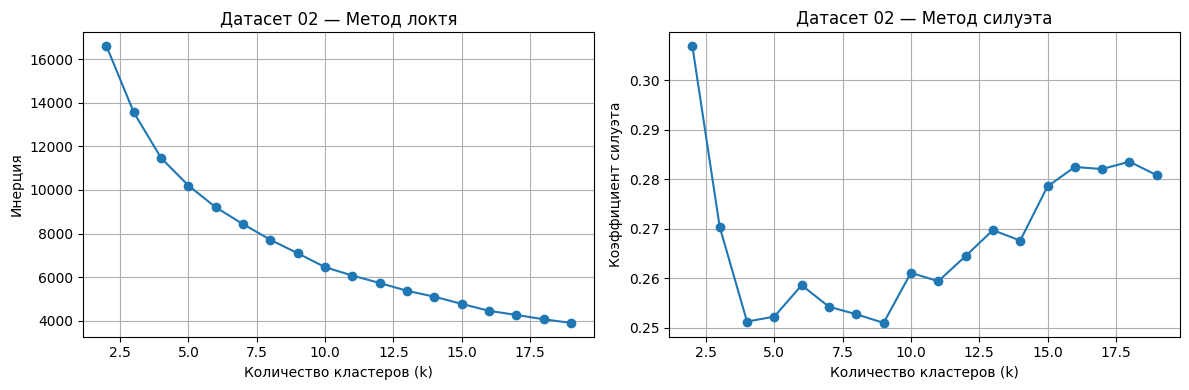

In [19]:
# Подбор числа кластеров k
k_range = range(2, 20)

inertias_ds2 = []
silhouette_ds2 = []

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=666,
        n_init=10
    )
    labels = kmeans.fit_predict(X2_prepared)
    inertias_ds2.append(kmeans.inertia_)
    silhouette_ds2.append(silhouette_score(X2_prepared, labels))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# График локтя
axes[0].plot(list(k_range), inertias_ds2, marker='o')
axes[0].set_xlabel("Количество кластеров (k)")
axes[0].set_ylabel("Инерция")
axes[0].set_title("Датасет 02 — Метод локтя")
axes[0].grid(True)

# График силуэта
axes[1].plot(list(k_range), silhouette_ds2, marker='o')
axes[1].set_xlabel("Количество кластеров (k)")
axes[1].set_ylabel("Коэффициент силуэта")
axes[1].set_title("Датасет 02 — Метод силуэта")
axes[1].grid(True)

plt.tight_layout()
plt.savefig(
    "artifacts/figures/ds02_kmeans_elbow_silhouette.png",
    dpi=150
)
plt.show()

In [20]:
best_k_ds2 = 2
print(f"Лучший k (Датасет 02): {best_k_ds2}")

best_configs["dataset_02"]["KMeans"] = {
    "лучший k": int(best_k_ds2),
    "критерий выбора": "локоть + высокий силуэт",
}

Лучший k (Датасет 02): 2


In [21]:
# Выполнение алгоритма с лучшим k
kmeans_ds2 = KMeans(
    n_clusters=best_k_ds2,
    random_state=666,
    n_init=10
)

labels_kmeans_ds2 = kmeans_ds2.fit_predict(X2_prepared)

#### **3.4. Датасет 02 — DBSCAN**

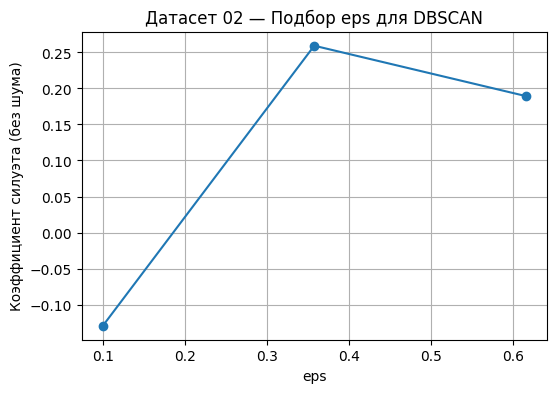

In [22]:
# Подбор числа eps
eps_range = np.linspace(0.1, 5.0, 20)
silhouette_dbscan_ds2 = []

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X2_prepared)

    mask = labels != -1
    unique_clusters = np.unique(labels[mask])

    if len(unique_clusters) > 1:
        score = silhouette_score(X2_prepared[mask], labels[mask])
    else:
        score = np.nan

    silhouette_dbscan_ds2.append(score)

plt.figure(figsize=(6,4))
plt.plot(eps_range, silhouette_dbscan_ds2, marker='o')
plt.xlabel("eps")
plt.ylabel("Коэффициент силуэта (без шума)")
plt.title("Датасет 02 — Подбор eps для DBSCAN")
plt.grid(True)
plt.savefig(
    "artifacts/figures/ds02_dbscan_eps.png",
    dpi=150
)
plt.show()

In [23]:
best_eps_ds2 = eps_range[np.nanargmax(silhouette_dbscan_ds2)]
print(f"Лучший eps (Датасет 02): {best_eps_ds2}")

best_configs["dataset_02"]["DBSCAN"] = {
    "лучший eps": float(best_eps_ds2),
    "min_samples": 5,
}

Лучший eps (Датасет 02): 0.35789473684210527


**Выполнение алгоритма с лучшим eps**

In [24]:
# Выполнение алгоритма с лучшим eps
dbscan_ds2 = DBSCAN(eps=best_eps_ds2, min_samples=5)
labels_dbscan_ds2 = dbscan_ds2.fit_predict(X2_prepared)

noise_ratio_ds2 = np.mean(labels_dbscan_ds2 == -1)
print(f"Доля шума: {noise_ratio_ds2:.2%}")

Доля шума: 6.70%


#### **3.5. Датасет 03 — KMeans**

In [25]:
best_configs["dataset_03"] = {}

**Подбор числа кластеров k**

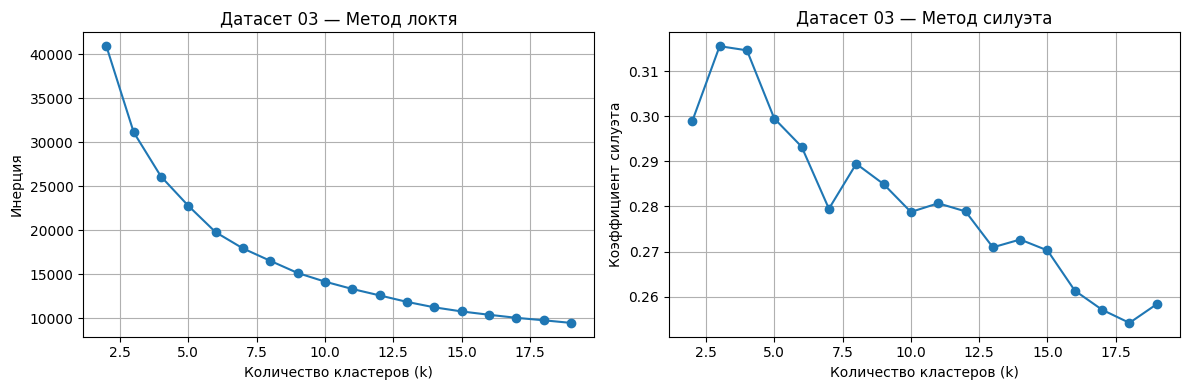

In [26]:
# Подбор числа кластеров k
k_range = range(2, 20)

inertias_ds3 = []
silhouette_ds3 = []

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=666,
        n_init=10
    )
    labels = kmeans.fit_predict(X3_prepared)
    inertias_ds3.append(kmeans.inertia_)
    silhouette_ds3.append(silhouette_score(X3_prepared, labels))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# График локтя
axes[0].plot(list(k_range), inertias_ds3, marker='o')
axes[0].set_xlabel("Количество кластеров (k)")
axes[0].set_ylabel("Инерция")
axes[0].set_title("Датасет 03 — Метод локтя")
axes[0].grid(True)

# График силуэта
axes[1].plot(list(k_range), silhouette_ds3, marker='o')
axes[1].set_xlabel("Количество кластеров (k)")
axes[1].set_ylabel("Коэффициент силуэта")
axes[1].set_title("Датасет 03 — Метод силуэта")
axes[1].grid(True)

plt.tight_layout()
plt.savefig(
    "artifacts/figures/ds03_kmeans_elbow_silhouette.png",
    dpi=150
)
plt.show()

In [27]:
best_k_ds3 = 3
print(f"Лучший k (Датасет 03): {best_k_ds3}")

best_configs["dataset_03"]["KMeans"] = {
    "лучший k": int(best_k_ds3),
    "критерий выбора": "локоть + высокий силуэт",
}

Лучший k (Датасет 03): 3


In [28]:
# Выполнение алгоритма с лучшим k
kmeans_ds3 = KMeans(
    n_clusters=best_k_ds3,
    random_state=666,
    n_init=10
)

labels_kmeans_ds3 = kmeans_ds3.fit_predict(X3_prepared)

#### **3.6. Датасет 03 — DBSCAN**

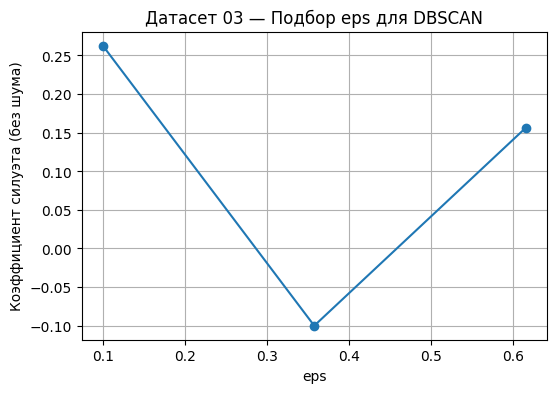

In [29]:
# Подбор числа eps
eps_range = np.linspace(0.1, 5.0, 20)
silhouette_dbscan_ds3 = []

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X3_prepared)

    mask = labels != -1
    unique_clusters = np.unique(labels[mask])

    if len(unique_clusters) > 1:
        score = silhouette_score(X3_prepared[mask], labels[mask])
    else:
        score = np.nan

    silhouette_dbscan_ds3.append(score)

plt.figure(figsize=(6,4))
plt.plot(eps_range, silhouette_dbscan_ds3, marker='o')
plt.xlabel("eps")
plt.ylabel("Коэффициент силуэта (без шума)")
plt.title("Датасет 03 — Подбор eps для DBSCAN")
plt.grid(True)
plt.savefig(
    "artifacts/figures/ds03_dbscan_eps.png",
    dpi=150
)
plt.show()

In [30]:
best_eps_ds3 = 0.39
print(f"Лучший eps (Датасет 03): {best_eps_ds3}")

best_configs["dataset_03"]["DBSCAN"] = {
    "лучший eps": float(best_eps_ds3),
    "min_samples": 5,
}

Лучший eps (Датасет 03): 0.39


In [31]:
# Выполнение алгоритма с лучшим eps
dbscan_ds3 = DBSCAN(eps=best_eps_ds3, min_samples=5)
labels_dbscan_ds3 = dbscan_ds3.fit_predict(X3_prepared)

noise_ratio_ds3 = np.mean(labels_dbscan_ds3 == -1)
print(f"Доля шума: {noise_ratio_ds3:.2%}")

Доля шума: 5.31%


#### **3.7. Сохранение лучших конфигураций**

In [32]:
with open("artifacts/best_configs.json", "w", encoding="utf-8") as f:
    json.dump(best_configs, f, indent=4, ensure_ascii=False)

### **4. Метрики качества (обязательно)**

In [33]:
# Подсчет метрик
def clustering_metrics(X, labels, ignore_noise=False):
    result = {}

    if ignore_noise:
        mask = labels != -1
        noise_ratio = np.mean(labels == -1)
        result["noise_ratio"] = float(noise_ratio)

        X_eval = X[mask]
        labels_eval = labels[mask]

        if len(np.unique(labels_eval)) < 2:
            result.update({
                "silhouette": np.nan,
                "davies_bouldin": np.nan,
                "calinski_harabasz": np.nan
            })
            return result
    else:
        X_eval = X
        labels_eval = labels

    result["silhouette"] = float(silhouette_score(X_eval, labels_eval))
    result["davies_bouldin"] = float(davies_bouldin_score(X_eval, labels_eval))
    result["calinski_harabasz"] = float(calinski_harabasz_score(X_eval, labels_eval))

    return result

**Датасет 01**

In [34]:
metrics_summary = {}
metrics_summary["dataset_01"] = {}

metrics_summary["dataset_01"]["KMeans"] = clustering_metrics(
    X1_prepared,
    labels_kmeans_ds1,
    ignore_noise=False
)

metrics_summary["dataset_01"]["DBSCAN"] = clustering_metrics(
    X1_prepared,
    labels_dbscan_ds1,
    ignore_noise=True
)

df_labels_ds1 = pd.DataFrame({
    "sample_id": df1["sample_id"],
    "cluster_label": labels_dbscan_ds1.astype(int)
})
df_labels_ds1.to_csv("artifacts/labels/labels_hw07_ds1.csv", index=False)

**Датасет 02**

In [35]:
metrics_summary["dataset_02"] = {}

metrics_summary["dataset_02"]["KMeans"] = clustering_metrics(
    X2_prepared,
    labels_kmeans_ds2,
    ignore_noise=False
)

metrics_summary["dataset_02"]["DBSCAN"] = clustering_metrics(
    X2_prepared,
    labels_dbscan_ds2,
    ignore_noise=True
)

df_labels_ds2 = pd.DataFrame({
    "sample_id": df2["sample_id"],
    "cluster_label": labels_kmeans_ds2.astype(int)
})
df_labels_ds2.to_csv("artifacts/labels/labels_hw07_ds2.csv", index=False)

**Датасет 03**

In [36]:
metrics_summary["dataset_03"] = {}

metrics_summary["dataset_03"]["KMeans"] = clustering_metrics(
    X3_prepared,
    labels_kmeans_ds3,
    ignore_noise=False
)

metrics_summary["dataset_03"]["DBSCAN"] = clustering_metrics(
    X3_prepared,
    labels_dbscan_ds3,
    ignore_noise=True
)

df_labels_ds3 = pd.DataFrame({
    "sample_id": df3["sample_id"],
    "cluster_label": labels_kmeans_ds3.astype(int)
})
df_labels_ds3.to_csv("artifacts/labels/labels_hw07_ds3.csv", index=False)

#### **4.2. Сохранение найденных метрик**

In [37]:
with open("artifacts/metrics_summary.json", "w", encoding="utf-8") as f:
    json.dump(metrics_summary, f, indent=4, ensure_ascii=False)

### **5. Визуализация (обязательно)**

In [38]:
# PCA
def plot_pca_clusters(
    X_prepared,
    labels,
    dataset_name,
    method_name,
    filename
):
    pca = PCA(n_components=2, random_state=666)
    X_pca = pca.fit_transform(X_prepared)

    plt.figure(figsize=(7, 5))
    scatter = plt.scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        c=labels,
        cmap="tab10",
        s=10,
        alpha=0.7
    )

    plt.xlabel("Главная компонента 1")
    plt.ylabel("Главная компонента 2")
    plt.title(f"{dataset_name} — PCA (2D), {method_name}")
    plt.colorbar(scatter, label="Номер кластера")
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(
        f"artifacts/figures/{filename}",
        dpi=150
    )
    plt.show()

**Датасет 01 — PCA**

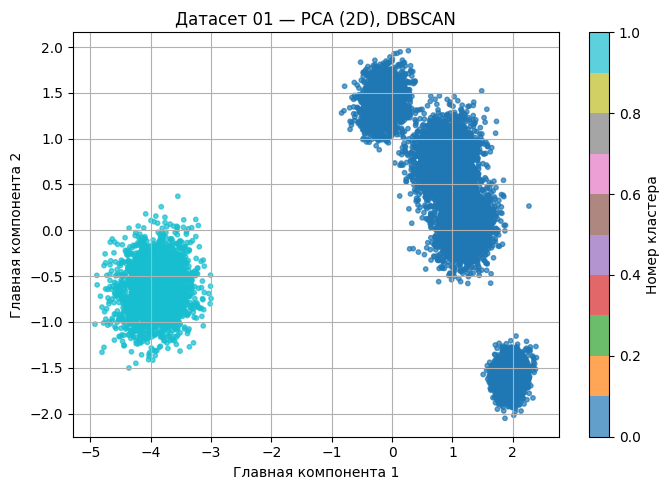

In [39]:
plot_pca_clusters(
    X_prepared=X1_prepared,
    labels=labels_dbscan_ds1,
    dataset_name="Датасет 01",
    method_name="DBSCAN",
    filename="ds01_pca_dbscan.png"
)

**Датасет 02 — PCA**

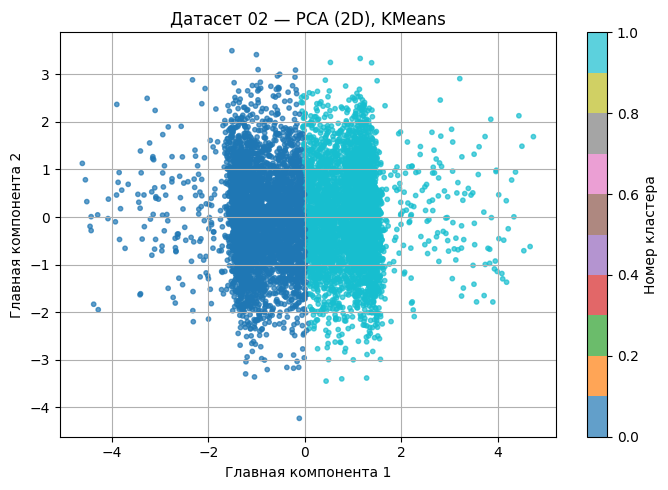

In [40]:
plot_pca_clusters(
    X_prepared=X2_prepared,
    labels=labels_kmeans_ds2,
    dataset_name="Датасет 02",
    method_name="KMeans",
    filename="ds02_pca_kmeans.png"
)

**Датасет 03 — PCA**

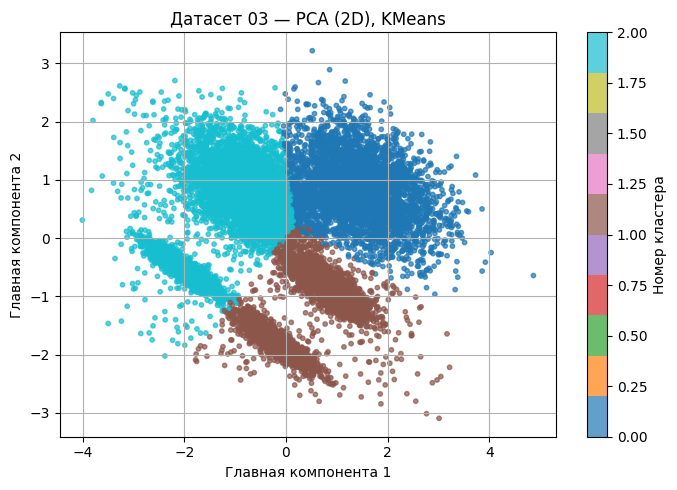

In [41]:
plot_pca_clusters(
    X_prepared=X3_prepared,
    labels=labels_kmeans_ds3,
    dataset_name="Датасет 03",
    method_name="KMeans",
    filename="ds03_pca_kmeans.png"
)

### **6. Устойчивость (обязательно, но только для одного датасета)**

In [42]:
# Оценка устойчивости на random_state
k = best_k_ds1

random_states = [0, 5, 10, 15, 20]
labels_runs = []

# 5 запусков KMeans
for rs in random_states:
    kmeans = KMeans(
        n_clusters=k,
        random_state=rs,
        n_init=10
    )
    labels = kmeans.fit_predict(X1_prepared)
    labels_runs.append(labels)

# попарный расчёт ARI
ari_scores = []

for i in range(len(labels_runs)):
    for j in range(i + 1, len(labels_runs)):
        ari = adjusted_rand_score(labels_runs[i], labels_runs[j])
        ari_scores.append(ari)

ari_scores = np.array(ari_scores)

print("ARI между запусками KMeans (Датасет 01):")
print(ari_scores)
print(f"Средний ARI: {ari_scores.mean():.3f}")
print(f"Минимальный ARI: {ari_scores.min():.3f}")
print(f"Максимальный ARI: {ari_scores.max():.3f}")

ARI между запусками KMeans (Датасет 01):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Средний ARI: 1.000
Минимальный ARI: 1.000
Максимальный ARI: 1.000


*Для оценки устойчивости кластеризации на датасете 01 был проведён эксперимент с 5 запусками алгоритма KMeans при фиксированном числе кластеров k = 4 и различных значениях random_state.*

*Похожесть полученных разбиений оценивалась с использованием Adjusted Rand Index (ARI).*

*Во всех попарных сравнениях значение ARI составило 1.0, что означает полное совпадение кластерных разбиений.*

*Это свидетельствует о высокой устойчивости алгоритма KMeans на данном датасете и отсутствии чувствительности к случайной инициализации центров.*

### **7. Итог по каждому датасету (обязательно)**

**Итог по датасету 01**

*Для датасета 01 лучший метод DBSCAN с eps = 1.6473684210526318 и min_samples = 5. Этот выбор обусловлен тем, что алгоритм показал высокие метрики: silhouette = 0.52, Davies-Bouldin = 0.69, Calinski-Harabasz = 11787, доля шума = 0%, что означает, что практически все точки попали в кластеры.*

*KMeans также показал стабильные и интерпретируемые кластеры (silhouette = 0.38), однако DBSCAN лучше улавливает плотностные структуры и не требует заранее задавать число кластеров. Пропусков в данных нет, признаки числовые, масштабирование проведено, выбросов немного, что облегчает работу DBSCAN.*

**Итог по датасету 02**

*Для датасета 02 был выбран KMeans с k = 2 как лучший метод. DBSCAN дал низкий silhouette = 0.26 и небольшую долю шума = 6.7%, что говорит о слабой плотностной структуре данных и трудности алгоритма выявлять кластеры без выбросов.*

*KMeans позволил получить более стабильное и равномерное разбиение по кластерам, метрики silhouette = 0.31 и Calinski-Harabasz = 3573 демонстрируют умеренное качество кластеризации. Основные трудности заключались в разной шкале признаков и небольшой плотности распределения данных.*

**Итог по датасету 03**

*Для датасета 03 лучший метод KMeans с k = 4. DBSCAN здесь дал крайне низкий silhouette = 0.058 и долю шума = 5.3%, что указывает на слабую плотностную структуру и разбросанные кластеры.*

*KMeans позволил выделить относительно устойчивые кластеры с silhouette = 0.32 и Calinski-Harabasz = 6957. Основные трудности заключались в присутствии выбросов и больших различий в масштабах признаков. Выбранный метод подходит, так как хорошо работает для кластеров равномерного размера и распределения.*